## Machine Learning: Forecasting eCommerce Sales with Linear Regression Using SKLearn

### 1. Background

Prediction is one of the use cases for machine learning in science, business, public policy and data journalism. Linear regression is a key technique for prediction.  It identifies a linear relationship between independent variable(s) (i.e. features) and a dependent variable (i.e. outcome).  It does this by fitting a line through the features that minimises the variances between the line and the data points.

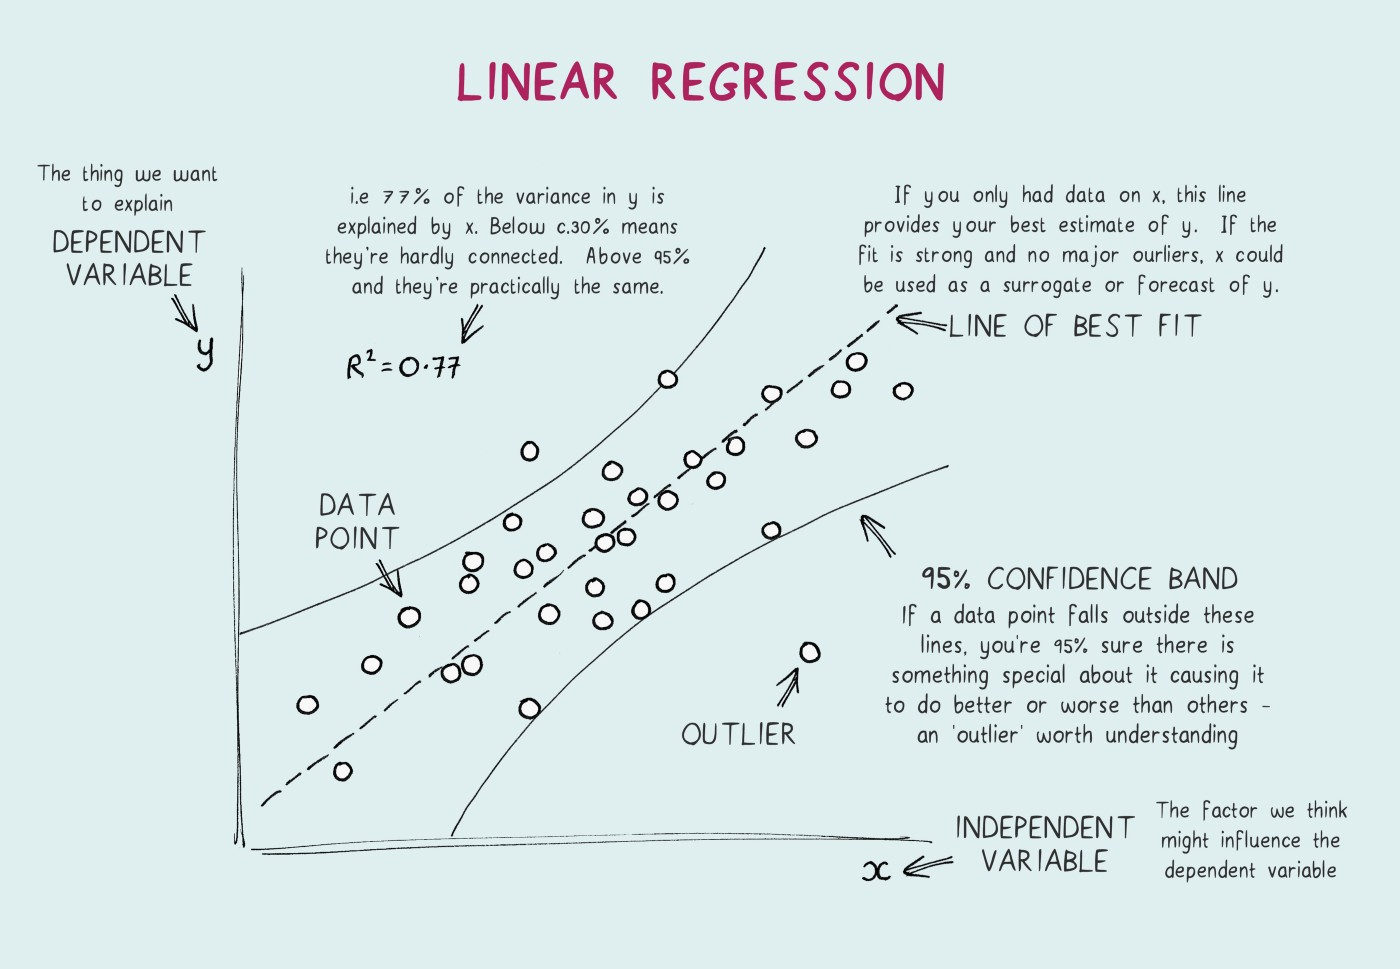

Image by [Dan White 1000](https://www.shutterstock.com/g/Dan+White+1000) on Shutterstock

This regression line defines the equation which is the model. The equation has an intercept point as a constant and then weights for each feature.  The prediction is calculated by adding up the weighted features along with the constant.  

$$\hat{Y} = \sum\limits_{j=1}^{n}({j}*\hat{\beta})  +  {c}$$

where $\hat{Y}$ is the prediction, n is the number of features, j is the value of the feature and $\hat{\beta}$ is its weight and c is the constant or intercept point on the y axis.

### 2. Objectives of Demo

To demonstrate predicting the level of spend by an e-commerce consumer based on their level of interactions with the site.  We are going to use a dataset from Kaggle which is a small data set of around 500 data points with 4 features (or dependent variables).  The technique we will illustrate for predicting is linear regression and the library we will employ for this is SciKitLearn (SKLearn).  Being a small dataset and a simple technique no GPU is needed.

### 3. Import the Libraries Needed

In [1]:
!pip install opendatasets --quiet

In [2]:
!pip install sklearn --quiet

In [3]:
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets

### 4. Download Dataset from Kaggle and Create a Dataframe

Remember that you will need a Kaggle username and api key to download.

In [4]:
od.download("https://www.kaggle.com/datasets/srolka/ecommerce-customers")

Skipping, found downloaded files in "./ecommerce-customers" (use force=True to force download)


In [5]:
df = pd.read_csv('../ML4BP/ecommerce-customers/Ecommerce Customers.csv')

### 5. Reviewing the Data

In [6]:
# Take a look at the first 10 data elements

df.head(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [7]:
# Looking at the broad measures for each feature and outcome (independent variables and dependent variable).

df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


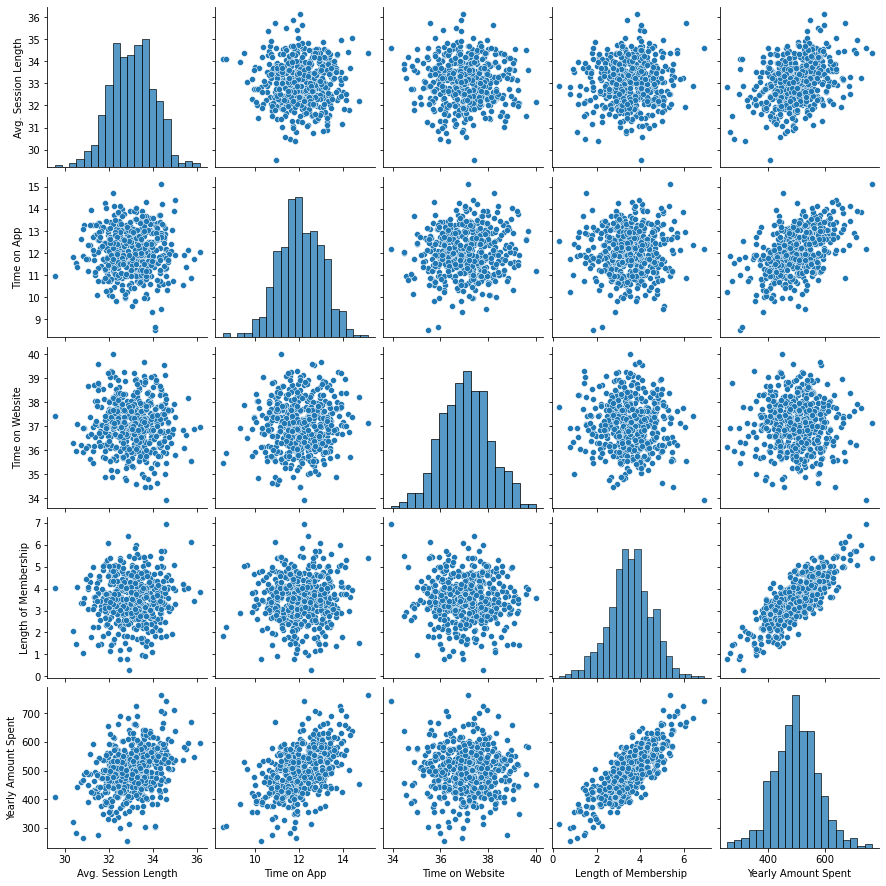

In [8]:
# Using Seaborn's pairplot to visually inspect the distribution of each variable 
# and the relationships between them.

sns.pairplot(df)

Dataset has 500 rows and all the variables visually appear to be approximations to a guassian distribution (which is helpful).  Each of the 4 predictor variables (features) visually appear to all have a positive correlation to the target variable.  The strengths of the correlations vary suggesting that using all of them in combination for prediction should be a good approach.   

### 6. Preparing Dataframes for Modelling

In [9]:
# Splitting the dataframe into separate dataframes for prediction variables (X) and target variables (Y).

X = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = df['Yearly Amount Spent']

In [10]:
# Splitting both X and Y datframes into training and testing datasets.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 7. Training the Model

In [11]:
# Training the linear regression model on the training data.

from sklearn  import linear_model 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
model.score(X_train, y_train)

0.9849805362181978

In [13]:
# The parameters of the model (coefficients and intercept).

print('Coefficient: ', model.coef_)
print('Intercept: ', model.intercept_)

Coefficient:  [25.82715542 38.29785805  0.47133977 61.67791375]
Intercept:  -1051.5644084105359


### 8. Using the Trained Model to Make Predictions Using Test Data

In [14]:
# Making the predictions

predicted = model.predict(X_test)
predicted

array([551.39458379, 531.88533858, 501.97903204, 454.88822904,
       415.87499656, 441.82827542, 545.43135213, 615.69603041,
       594.54826988, 444.73591746, 445.09966111, 502.38790519,
       478.26628555, 589.35003808, 576.20902312, 398.18104911,
       423.79774807, 480.29787259, 313.61256454, 608.65884858,
       606.08774683, 457.06525715, 393.75086955, 503.14429952,
       574.51035958, 421.59162441, 472.40975032, 530.63493704,
       485.47394375, 313.57532743, 599.11679232, 325.45894802,
       539.37333207, 387.43956872, 455.78810633, 467.8901246 ,
       481.55201483, 555.89477871, 543.33650245, 590.52401478,
       511.55140188, 438.05826845, 434.93374075, 645.5880059 ,
       506.84293776, 572.36577666, 507.85017989, 461.64357751,
       560.6820129 , 551.9514261 , 533.92261253, 514.76437572,
       552.80365802, 551.02111205, 620.677818  , 534.91042093,
       571.77232238, 305.34699822, 764.74899552, 402.04358406,
       539.33770822, 527.24953196, 487.67189185, 486.80

In [15]:
# Determining the accuracy of the predictions

print('Coefficient of determination (R^2): %.3f' % r2_score(y_test, predicted))
print('Mean squared error (MSE): %.3f'% mean_squared_error(y_test, predicted))
print('Root mean squared error (RMSE) : %.3f'% sqrt(mean_squared_error(y_test, predicted)))

Coefficient of determination (R^2): 0.981
Mean squared error (MSE): 119.200
Root mean squared error (RMSE) : 10.918


### 9. Creating a UI to Predict eCommerce Sales (Using ipywidgets and the Model)

The model can now be used to predict the e-commerce sales for an individual customer based on the four predictor variables.  Input the customers data into the UI and click the predict button to obtain the prediction.

Sample of data to use:<br>
    - Average session length of 33.54<br>
    - Time on app of 11.85<br>
    - Time on website of 37.42<br>
    - Length of membership of 1.76<br>

In [16]:
def predict(a):
    session_length_input = float(text1.value)
    time_in_app_input = float(text2.value)
    time_on_website_input = float(text3.value)
    length_of_membership_input = float(text4.value)
    prediction_to_output = model.predict([[session_length_input, time_in_app_input, time_on_website_input, length_of_membership_input]])
    label5.value='Predicted eCommerce Sales = '+str(prediction_to_output)
    
header = widgets.Label(value = 'ECOMMERCE SALES PREDICTOR')

label1 = widgets.Label(value = 'Input Average Session Length :')
text1 = widgets.Text()

label2 = widgets.Label(value = 'Input Time on App :')
text2 = widgets.Text()

label3 = widgets.Label(value = 'Input Time on Website :')
text3 = widgets.Text()

label4 = widgets.Label(value = 'Input Length of Membership :')
text4 = widgets.Text()

button = widgets.Button(description="Predict")
label5 = widgets.Label()

display(header, label1, text1, label2, text2, label3, text3, label4, text4, button, label5)

button.on_click(predict)

Label(value='ECOMMERCE SALES PREDICTOR')

Label(value='Input Average Session Length :')

Text(value='')

Label(value='Input Time on App :')

Text(value='')

Label(value='Input Time on Website :')

Text(value='')

Label(value='Input Length of Membership :')

Text(value='')

Button(description='Predict', style=ButtonStyle())

Label(value='')

### 10. Acknowledgements

E-Commerce dataset from Kaggle at [link](https://www.kaggle.com/datasets/srolka/ecommerce-customers)<br>
Linear regression using SKLearn at [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)<br>
Pairwise plot using Seaborn at [link](https://seaborn.pydata.org/generated/seaborn.pairplot.html)<br>
UI using ipywidgets at [link](https://ipywidgets.readthedocs.io/en/stable/index.html)<br>